
# **Plotten & Fallbewegung – Schritt für Schritt** 
Ziel ist die Simulation einer Fallbewegung mithilfe numerischer Verfahren. 
Dieses Notebook dient zur Erarbeitung der technischen Hilfsmittel, mit der die Simulation schließlich durchgeführt und ausgewertet werden kann.
A: Ausgabe von Wertetabellen
B: Plot-Funktion für die Darstellung von Listen Listen mit Auto- oder Fix-Skalierung (per Schieberegler), Eingabe von Parametern über Schieberegler oder Eingabefeldern
C: Numerische Verfahren: Euler, Halbschritt

In [1]:
%matplotlib widget 


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False


# **Teil A: Ausgabe von Wertetabellen**

Wir schreiben die Funktion `show_table (*lists, columns = None)` zu Anzeige einer Wertetabelle.   
Um Wertetabellen von Funktionen auszugeben, schreiben wir eine weitere Funktion `function_data(function, x_min, x_max, delta_x)`. Diese gibt zwei Listen zurück: Eine Liste mit den x Werten eine Liste mit den zugehörigen y-Werten.


In [3]:
import pandas as pd
from IPython.display import display, HTML

def show_table(*lists, columns=None, max_height='200px', show_digits = 4):
    """
    Zeigt eine Wertetabelle für beliebig viele Listen an.
    - lists: beliebig viele Listen (z.B. x, y, ...)
    - columns: optionale Liste mit Spaltenüberschriften
    - max_height: maximale Höhe der Tabelle (z.B. '200px')
    Wenn max_height angegeben ist, wird die Tabelle mit einem Scrollbalken versehen, wenn sie größer als die angegebene Höhe ist.
    """
    df = pd.DataFrame(list(zip(*lists)))
    pd.set_option('display.precision', show_digits)#Nachkommastellen
    if columns is not None:
        df.columns = columns
    # Tabelle mit Scrollbalken anzeigen
    styles = f"""
     <div style="max-height: {max_height}; overflow-y: auto; display: inline-block;">
        {df.to_html(index=False, border=1)}
    </div>
    """
    display(HTML(styles))

def function_data(function, x_min, x_max, delta_x):
    """
    Gibt zwei Listen zurück:
    - x_values: Werte von x_min bis x_max mit Schrittweite delta_x
    - y_values: Funktionswerte zu den x-Werten
    """
    x_values = []
    y_values = []
    x = x_min
    while x <= x_max:
        x_values.append(x)
        y_values.append(function(x))
        x += delta_x
    return x_values, y_values

def show_function_table(function, x_min, x_max, delta_x, columns=['x', 'f(x)']):
    """
    Zeigt eine Wertetabelle für die gegebene Funktion an.
    - function: Funktion, die ausgewertet werden soll
    - x_min: Minimalwert für x
    - x_max: Maximalwert für x
    - delta_x: Schrittweite für x
    """
    x_values, y_values = function_data(function, x_min, x_max, delta_x)
    show_table(x_values, y_values, columns=columns)      
    
show_function_table(lambda x: x**2,  0, 100, 1) #lambda erzeugt eine anonyme Funktion, die x**2 berechnet


x,f(x)
0,0
1,1
2,4
3,9
4,16
5,25
6,36
7,49
8,64
9,81


#### **Aufgabe 1** 
a) Gib die Wertetabelle der Funktion $f(x)=\sqrt x$ für x von 0 bis 10 mit einer Schrittweite von 0.1 aus.  
b) Erzeuge eine Liste mit 100 Zufallszahlen zwischen 0 und 100 und gib ihre Werte mit der Überschrift Zufallszahlen aus.


In [4]:
show_function_table(lambda x: x**0.5,0,10,0.1)

x,f(x)
0.0,0.0000
0.1,0.3162
0.2,0.4472
0.3,0.5477
0.4,0.6325
0.5,0.7071
0.6,0.7746
0.7,0.8367
0.8,0.8944
0.9,0.9487


In [5]:
from random import *
random_values=[randint(0,100) for i in range(100)]
show_table(random_values, columns=['Zufallszahlen'])   

Zufallszahlen
53
22
45
50
79
59
25
68
84
63


# **Teil B: Allgemeine Plot-Funktion für Listen**

Wir schreiben die Funktion `plot_lists(...)` für die graphische Ausgabe zweier Listen:  

`def plot_lists(x_values, y_values, autoscale=True, x_min=0, x_max=10, y_min = 0, y_max = 10, title='Plot von Listen', marker="o"):`  <br>
Plottet zwei Listen gleicher Länge.   
* `autoscale=True` : automatische Skalierung der Achsen, sonst werden feste Achsengrenzen (x_min, x_max, y_min, y_max) verwendet.  
* `title`: Titel des Plots  
* `marker`:   
    * "o": Nur Datenpunkte  
    * "": Nur Linie  
    * "o-", Punkte samt Linie   
    

C:\Users\Admin\AppData\Local\Temp\ipykernel_31236\880929955.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


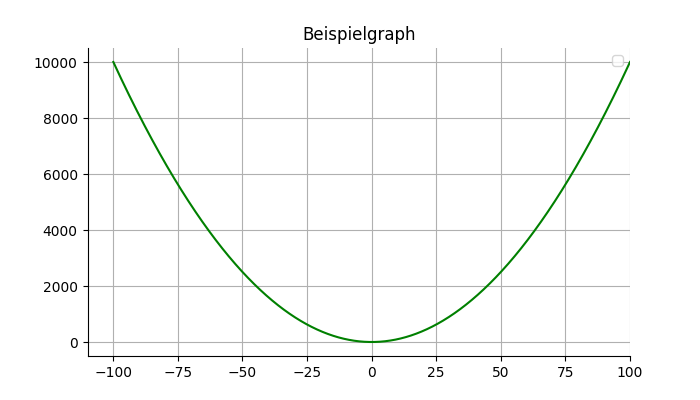

(<Figure size 700x400 with 1 Axes>, <Axes: title={'center': 'Beispielgraph'}>)

In [6]:
def plot(x_values, y_values, x_min=None, x_max=None, y_min = None, y_max = None, title='Plot von Listen', marker="", label = None):
    """
    Plottet zwei Listen gleicher Länge mit den angegebenen Achsengrenzen. Falls eine dieser Grenzen den Wert None hat, 
    so wird eine automatische Skalierung aktiv. 
    
    titel: Titel des Plots
    marker: Wenn "o", werden die Punkte ohne Markierung geplottet,
            wenn leer,  wird nur die Linie geplottet.
            Wenn "o-", werden die Punkte samt Linie geplottet.
            Wenn "--", wird eine gestrichelte Linie gezeichnet.
            Über einen Farbcode kann man die Farbe ändern, einfach den Buchstaben als erstes Zeichen des Markers verwenden:
            b für blau, g für grün, r für rot, c für cyna, m für magenta, y für gelb, k für schwarz

    """
    #Alte Plots schließen'
    plt.close("all") # Speicher freigeben
    if len(x_values) != len(y_values):
        raise ValueError('x_values und y_values müssen gleich lang sein.')
    #Titel und Achsen
    fig, ax = plt.subplots()
    ax.plot(x_values, y_values, marker, label=label)  # linestyle "-" für durchgehende Linie
    #ax.set_xlabel('x')
    #ax.set_ylabel('y')
    ax.set_title(title)
    ax.legend()
    if x_min != None:
         ax.set_xlim(left=x_min)
    if x_max != None:
         ax.set_xlim(right=x_max)
    if y_min != None:
         ax.set_ylim(bottom=y_min)
    if y_max != None:
         ax.set_ylim(top=y_max)

    #Ausgabe
    plt.show()
    #RÜckgabe der Zeichenfläche und des Koordinatensystems, um das Diagramm später über Schieberegler verändern zu können
    return fig, ax


#Ausgabe einer Parabel
x_values, y_values = function_data(lambda x: x**2, -100, 100, 0.1)
plot(x_values, y_values,  x_max=100, marker='g', title='Beispielgraph')


#### **Aufgabe 2**
a) Zeichne eine nach unten geöffnete Parabel mit $x \in [-20,20]$.  
b) Erstelle einen Plot für das t-y-Diagramm eines aus 10 m frei fallenden Körpers. Erstelle dazu zunächst eine Funktion für die Berechnung eines freien Falls aus einer beliebigen Höhe. Sie soll zwei Listen mit den Werten für t und y in einer wählbaren Schrittweite zurückgeben.

C:\Users\Admin\AppData\Local\Temp\ipykernel_31236\880929955.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


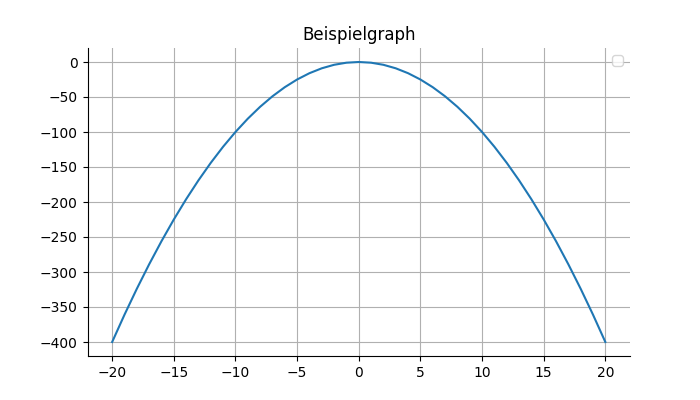

(<Figure size 700x400 with 1 Axes>, <Axes: title={'center': 'Beispielgraph'}>)

In [7]:
x_values, y_values = function_data(lambda x: -x**2, -20, 20, 1)
plot(x_values, y_values,  marker='', title='Beispielgraph')

C:\Users\Admin\AppData\Local\Temp\ipykernel_31236\880929955.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


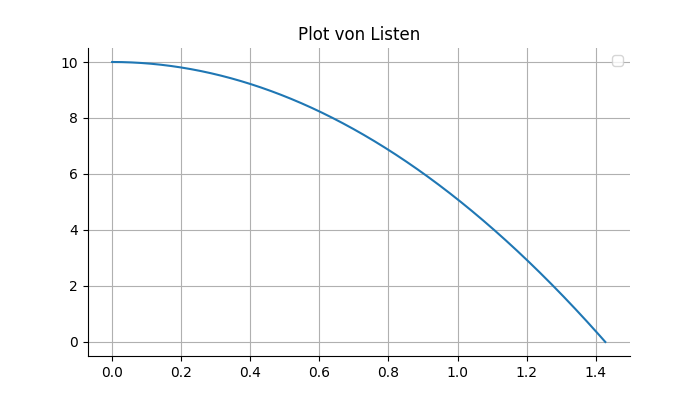

(<Figure size 700x400 with 1 Axes>,
 <Axes: title={'center': 'Plot von Listen'}>)

In [8]:
def free_fall(height,t_start=0, delta_t=0.001):
    """ Berechnet die Werte für den freien Fall eines Körpers aus der Höhe h. """
    t_values = []
    y_values = []
    g = 9.81
    t = t_start
    while True:
        y = height - 0.5 * g * t**2
        
        t_values.append(t)
        y_values.append(y)
        if y < 0:
            break
        t += delta_t
    return t_values, y_values

plot(free_fall(10)[0], free_fall(10)[1])


# **Teil C: Einem Diagramm weitere Linien hinzufügen**
Zum Vergleich von Graphen ist es oft praktisch, mehrere Listen in einem gemeinsamen Koordinatensystem darzustellen. Im Folgenden wird gezeigt, wie man das erreicht.

In [9]:
def add_graph(fig, ax, x_values, y_values, label=None, marker=""):
    """
    Fügt dem Diagramm mit der Zeichnefläche fig und dem Koordinatensystem ax einen weiteren Graphen hinzu
    Achtung: Nach setzen einer der Grenzen für die Koodinatenachsen funktioniert die automatische Anpassung der betreffenden Achse nicht mehr
    x_values: Liste der x-Werte
    y_values: Liste der y-Werte
    label: Legendenbeschriftungen (optional)
    marker: Darstellung (optional, z.B. ['o-','--'])
    """
    ax.plot(x_values, y_values, marker, label=label)
    ax.relim()
    ax.legend()
    ax.autoscale_view()
    ax.legend()
    fig.canvas.draw_idle()
   
    

#### **Aufgabe 3**  
Zeichne die Graphen der Funktion f mit f(x) = x**2 und g mit g(x) = 0.5*x für x von -1 bis 1 in ein gemeinsames Schaubild und gib eine passende Legende aus.

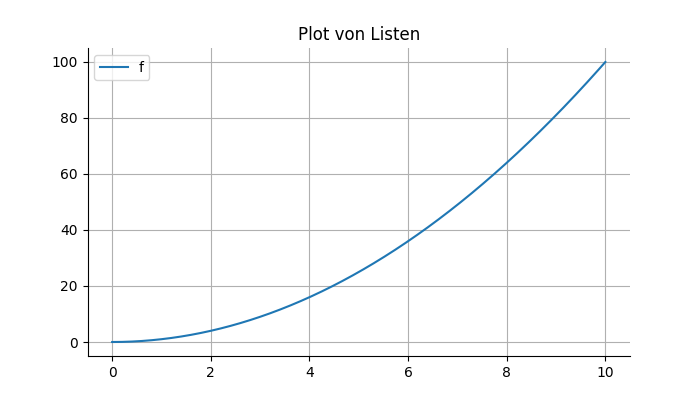

In [18]:
#Funktion f
x_values, y_values = function_data(lambda x: x**2, 0,10, 0.01)
fig, ax= plot(x_values, y_values, label="f")
#Funktion g
x_values, y_values = function_data(lambda x: 0.5*x, 0, 20, 0.01)
add_graph(fig, ax, x_values, y_values, label="g")

# **Teil D: Simulation von Fallbewegungen ohne Luftwiderstand mit dem Euler-Verfahren**
In diesem Abschnitt sollen Fallbewegungen mit dem Euler-Verfahren simuliert werden, und zwar zunächst ohne Luftwiderstand. Sie dir dazu die Funktion `calc_free_fall` an und bearbeite dann Aufgabe 4. 

Zeit (s),Höhe (m),Geschwindigkeit (m/s)
0.00,10.0000,5.0000
0.02,10.1000,4.8038
0.04,10.1961,4.6076
0.06,10.2882,4.4114
0.08,10.3765,4.2152
0.10,10.4608,4.0190
0.12,10.5411,3.8228
0.14,10.6176,3.6266
0.16,10.6901,3.4304
0.18,10.7587,3.2342


C:\Users\Admin\AppData\Local\Temp\ipykernel_31236\880929955.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


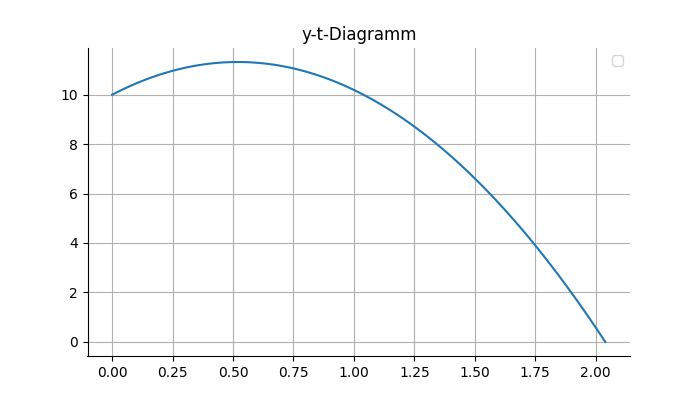

(<Figure size 700x400 with 1 Axes>, <Axes: title={'center': 'y-t-Diagramm'}>)

In [11]:
def calc_free_fall(y_start=10.0, v_start=0.0, dt=0.02, t_min=0, t_max=None):
    """Berechnet den Bewegungsablauf eines frei fallenden Körpers. 
    -t_min: Startzeitpunt
    -y_start: Starthöhe in m (zum Zeitpunkt t_min)
    -v_start: Startgeschwindigkeit in m/s (zum Zeitpunkt t_min)
    -dt: Schrittweite
    -t_max: Zeitpunkt, bis zu dem berechnet wird. Falls None bricht die Berechnung ab, sobald die Höhe unter 0 fällt 
    Zurückgegeben werden die Listen mit den Werten für die Zeitpunkte, die Höhen und die Geschwindigkeiten.
    """
    g = -9.81  # Erdbeschleunigung in m/s^2
    #Startwerte festlegen
    t=t_min
    y=y_start
    v=v_start
    t_values = [t_min]
    y_values = [y_start]
    v_values = [v_start]
    
    while (t_max == None and y >=0) or (t_max != None and t <= t_max):
        t = t + dt
        y = y + v*dt
        v = v + g*dt
        t_values.append(t)
        y_values.append(y)
        v_values.append(v)
    
    return t_values, y_values, v_values

# kurzer Test

t_values, y_values, v_values = calc_free_fall(v_start=5)
show_table(t_values, y_values, v_values, columns=['Zeit (s)', 'Höhe (m)', 'Geschwindigkeit (m/s)'], max_height='200px')
plot(t_values, y_values, title='y-t-Diagramm', marker='')

#### **Aufgabe D1**
a) Simuliere einen freien Fall aus einer Höhe von 100 m. Bestimme den Aufprallzeitpunkt und die Aufprallgeschwindigkeit. Zeichne das y-t- und das v-t-Diagramm.  
b) Simuliere einen senkrechten Wurf mit einer Starthöhe von 10 m und einer Abwurfgeschwindigkeit von 10 m/s nach oben. Bestimme die maximale Höhe.

Aufprallzeitpunkt 4.5400 s, Aufprallgeschwindigkeit -44.54 m/s


C:\Users\Admin\AppData\Local\Temp\ipykernel_31236\880929955.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


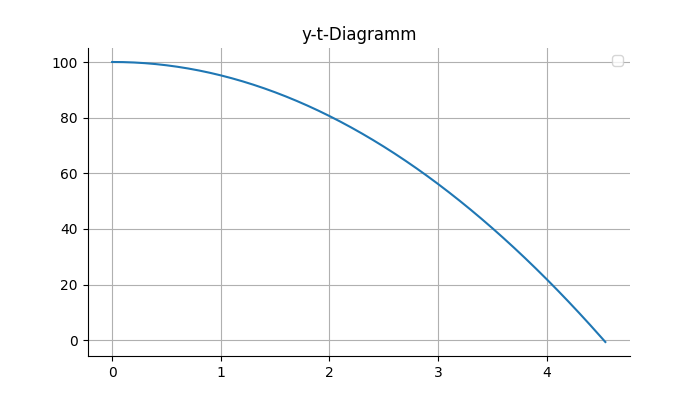

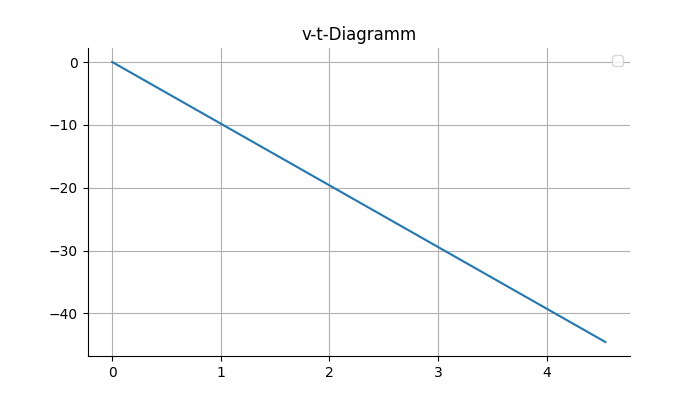

(<Figure size 700x400 with 1 Axes>, <Axes: title={'center': 'v-t-Diagramm'}>)

In [12]:
#a) Freier Fall aus 100 m.
t_values, y_values, v_values = calc_free_fall(y_start = 100, v_start=0)
T = t_values[len(t_values)-1]
V = v_values [len(v_values)-1]
print(f"Aufprallzeitpunkt {T:.4f} s,", f"Aufprallgeschwindigkeit {V:.2f} m/s")
plot(t_values, y_values, title = "y-t-Diagramm" )
plot(t_values, v_values, title = "v-t-Diagramm" )


C:\Users\Admin\AppData\Local\Temp\ipykernel_31236\880929955.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


15.196900000000005


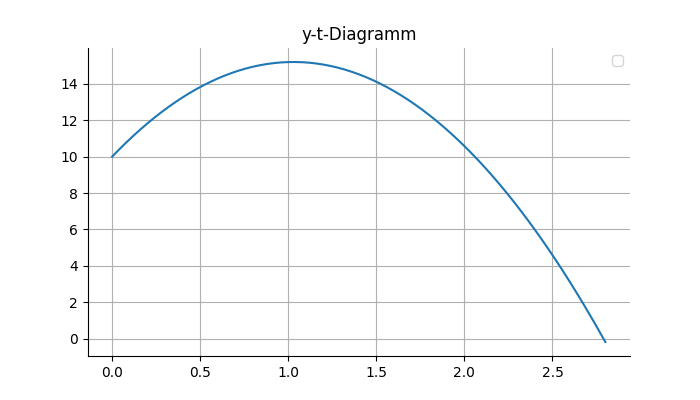

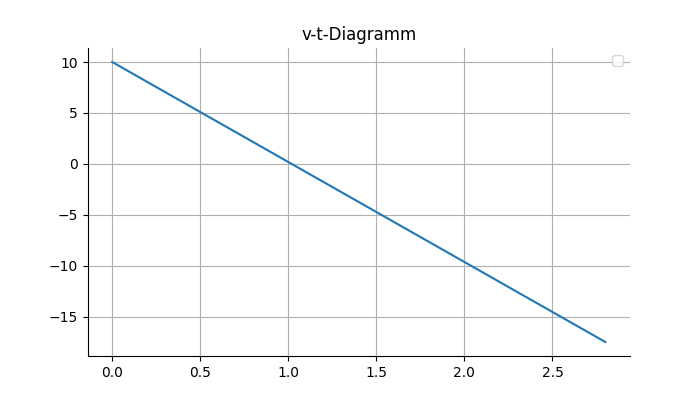

(<Figure size 700x400 with 1 Axes>, <Axes: title={'center': 'v-t-Diagramm'}>)

In [13]:
#b) Senkrechter Wurf mit Starthöhe von 10 m und Abwurfgeschwindigkeit von 10 m/s nach oben
t_values, y_values, v_values = calc_free_fall(y_start = 10, v_start=10)
print(max(y_values))
plot(t_values, y_values, title = "y-t-Diagramm" )
plot(t_values, v_values, title = "v-t-Diagramm" )

#### **Ergänzung: Verwenden von Schiebereglern**  
Wir verwenden einen Schieberegler, um die Veränderung des y-t-Diagramms mit der Abwurfgeschwindigkeit zu untersuchen.

Zeit (s),Höhe (m),Geschwindigkeit (m/s)
0.00,10.0000,0.0000
0.02,10.0000,-0.1962
0.04,9.9961,-0.3924
0.06,9.9882,-0.5886
0.08,9.9765,-0.7848
0.10,9.9608,-0.9810
0.12,9.9411,-1.1772
0.14,9.9176,-1.3734
0.16,9.8901,-1.5696
0.18,9.8587,-1.7658


C:\Users\Admin\AppData\Local\Temp\ipykernel_31236\880929955.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


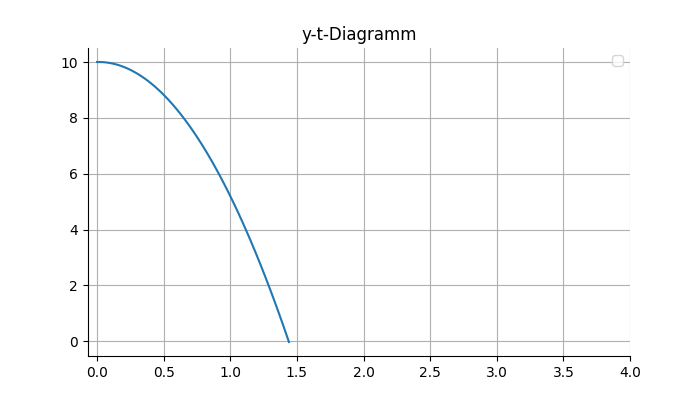

interactive(children=(FloatSlider(value=0.0, description='v in m/s', max=20.0, readout_format='.0f', step=1.0)…

<function __main__.update_curve(v_start, y_start, dt)>

In [22]:
h = 10
t_values, y_values, v_values = calc_free_fall(h, v_start=0)
show_table(t_values, y_values, v_values, columns=['Zeit (s)', 'Höhe (m)', 'Geschwindigkeit (m/s)'], max_height='200px')
fig, ax = plot(t_values, y_values, x_max=4,  title = "y-t-Diagramm" )


def update_curve(v_start, y_start, dt):
    #Hinweis: Falls eine der Achsengrenzen gesetzt ist funktioniert der Autozoom für die entsprechende Achse nicht mehr
    lines = ax.get_lines()[0] #Liste mit den Werten
    t_values, y_values, v_values = calc_free_fall(y_start = y_start, v_start=v_start, dt = dt)
    lines.set_data(t_values, y_values)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle() 

x_values, y_values = free_fall(h,0)
add_graph(fig, ax, x_values, y_values, label = "analytisch")

#Schieberegler
v_slider = widgets.FloatSlider(value=0.00, min=0.00, max=20, step=1, description='v in m/s', readout_format='.0f')
dt_slider = widgets.FloatSlider(value=0.01, min=0.001, max=2, step=0.001, description='dt in s', readout_format='.4f')
widgets.interact(update_curve, v_start=v_slider, y_start = widgets.fixed(10)  , dt = dt_slider)



#### **Aufgabe D2**  
Untersuche, wie sich die Schrittweite auf die Qualität der Simulation auswirkt. Zeichne hierzu in den vorherigen Graphen zusätzlich den analytisch berechneten Graphen ein.